In [77]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [78]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [79]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [80]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)


In [81]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [82]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [83]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [84]:
# list of columns for measurement

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [85]:
# list of columns for station

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [86]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [87]:
# Find the most recent date in the data set.
rec_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(rec_date)


2017-08-23


In [88]:
#find the date from 12 months ago
months = dt.datetime.strptime(rec_date, '%Y-%m-%d')  - dt.timedelta(days=365)
months

datetime.datetime(2016, 8, 23, 0, 0)

In [89]:
# Find the first date in the data set.
first_date = session.query(Measurement.date).order_by(Measurement.date.asc()).first().date
print(first_date)

2010-01-01


In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
result_months = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= '2016-08-24').\
                             filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()
result_months

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [91]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#sort dataframe by date
result_months = pd.DataFrame(result_months, columns = ['date','prcp'])
months_gb = result_months.groupby(by='date').mean()
months_gb = months_gb.reset_index()
months_gb = months_gb.set_index('date')
months_gb.head()

,prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


<AxesSubplot:xlabel='date'>

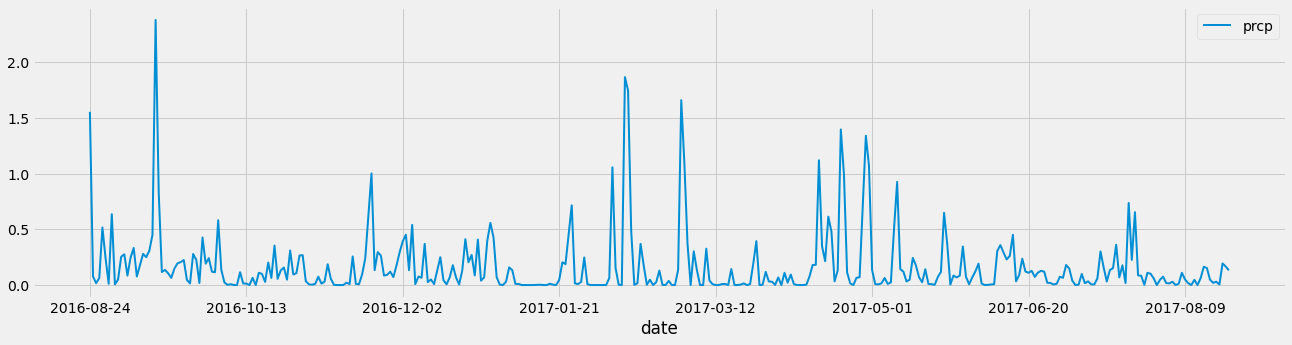

In [116]:
# Use Pandas to calcualte the summary statistics for the precipitation data
months_gb.plot(figsize=(20,5),linewidth=2)



In [93]:
# Summary Statistics of precipitation
months_gb.describe()

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [94]:
# list of columns for station

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [95]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [96]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

act_stat = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
act_stat

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [97]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stat_id = act_stat [0][0]
temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == stat_id).all()
temp

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Temp Observations')

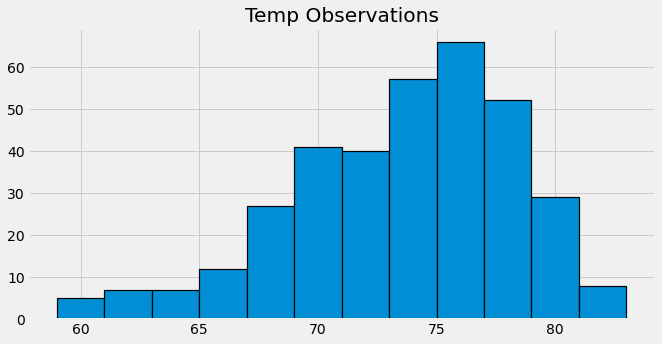

In [114]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
m_a_station = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
                            filter(Measurement.station == 'USC00519281' ).filter(Measurement.date > months).\
                            order_by(Measurement.date.desc()).all()

m_a_station_df = pd.DataFrame(m_a_station)
m_a_station_df.hist(bins=12,figsize=(10,5),edgecolor='black', linewidth=1.2)
plt.title('Temp Observations')


# Close session

In [117]:
# Close Session
session.close()